# Exercise - Classification of Survived Passengers on Titanic Dataset

The 'titanic-train.csv' contains data of passenger details aboard the titanic, and whether they survived or not. We have to make a model which will predict their survival. The features are as follows:  

Survived - Survival (0 = No; 1 = Yes)  
Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)  
Name - Name  
Sex - Sex  
Age - Age  
SibSp - Number of Siblings/Spouses Aboard  
Parch - Number of Parents/Children Aboard  
Ticket - Ticket Number  
Fare - Passenger Fare (British pound)  
Cabin - Cabin  
Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)  

## Solve the following questions:
1. Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns. 
2. Plot a bar chart of the survived column. 
3. Plot a bar chart of the number of females who survived and not, and similarly males who survived and not. 
4. **BONUS** Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html
5. Check if there are missing values in any columns. Remove such rows in the dataset.  
6. Convert categorical values (if any) to numbers in the dataset.
7. Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?
8. Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset. 

## Decision Tree Modelling
#### Use a decision tree classifier with a minimum depth of 6, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model.

## Perceptron Modelling
#### Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model. 

## Which of the two models fairs better? 


### BONUS
There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely?

In [2]:
import pandas as pd

In [3]:
titanic = pd.read_csv("./data/titanic-train.csv")
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Based on logical reasoning, decide which variables are absolutely not required or relevant to the model. List them down and drop those columns.

In [4]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic=titanic.drop(['Cabin','Ticket','PassengerId','Name'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
import warnings
warnings.filterwarnings('ignore')

## Plot a bar chart of the survived column.

<Axes: xlabel='Survived'>

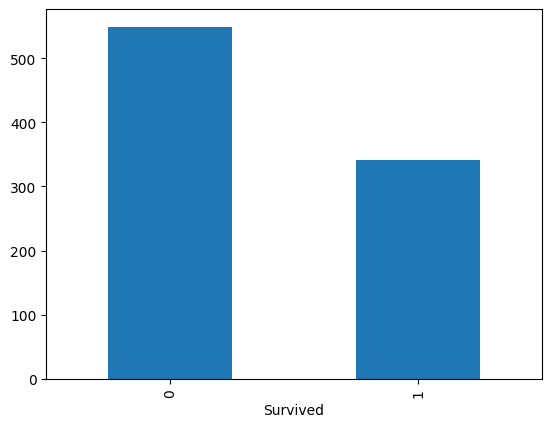

In [7]:
titanic['Survived'].value_counts().plot(kind='bar')

## Plot a bar chart of the number of females who survived and not, and similarly males who survived and not.

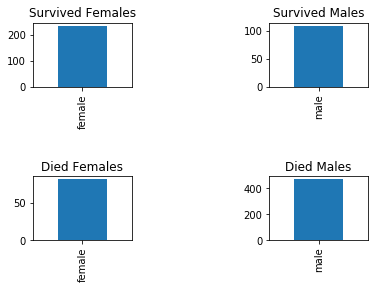

In [7]:
import matplotlib.pyplot as plt

sur=titanic['Survived']==1
nsur=titanic['Survived']==0
male=titanic['Sex']=='male'
fem=titanic['Sex']=='female'

plt.subplot(3,3,1)
plt.title('Survived Females')
fm=titanic[(sur&fem)]
fm['Sex'].value_counts().plot(kind='bar')

plt.subplot(3,3,3)
plt.title('Survived Males')
m=titanic[(sur&male)]
m['Sex'].value_counts().plot(kind='bar')

plt.subplot(3,3,7)
plt.title('Died Females')
fm=titanic[(nsur&fem)]
fm['Sex'].value_counts().plot(kind='bar')

plt.subplot(3,3,9)
plt.title('Died Males')
m=titanic[(nsur&male)]
m['Sex'].value_counts().plot(kind='bar')


## Plot a stacked bar chart of survived or not based on PClass(i.e how many survived and not for 1st, 2nd and 3rd class). The graph can be made by referring to https://matplotlib.org/examples/pylab_examples/bar_stacked.html

In [8]:
import numpy as np
import matplotlib.pyplot as plt

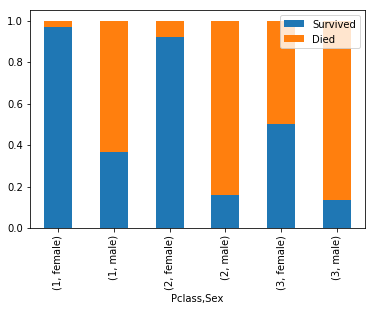

In [9]:
st=titanic.groupby(['Pclass','Sex'])['Survived'].agg([np.mean,lambda x : 1-np.mean(x)])
st.columns=['Survived','Died']
st.plot.bar(stacked=True)

In [10]:
titanic.shape

(891, 8)

In [11]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [12]:
titanic=titanic.dropna()
titanic.shape

(712, 8)

## Convert categorical values (if any) to numbers in the dataset.

In [13]:
#cat_map={'C':0,'Q':1,'S':2}
#titanic['Embarked']=titanic['Embarked'].apply(lambda x: int(cat_map[x]))
#gen_map={'male':0,'female':1}
#titanic['Sex']=titanic['Sex'].apply(lambda x: int(gen_map[x]))

In [14]:
titanic['Embarked'].replace(['C','Q','S'], [0,1,2], inplace=True)
titanic['Sex'].replace(['male','female'], [0,1], inplace=True)    

In [15]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,2
1,1,1,1,38.0,1,0,71.2833,0
2,1,3,1,26.0,0,0,7.9250,2
3,1,1,1,35.0,1,0,53.1000,2
4,0,3,0,35.0,0,0,8.0500,2


## Plot a heatmap of the correlation between all columns. There are columns are inter-related. Which are those colums? Can you drop either one of the inter-related column before proceeding ahead?

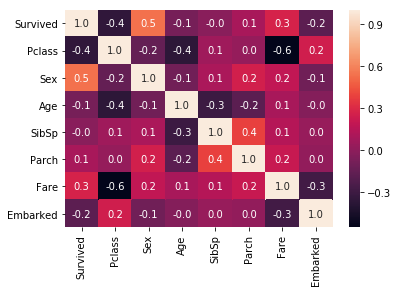

In [16]:
import seaborn as sb
sb.heatmap(titanic.corr(),annot=True,fmt='.1f')  #cmap

In [17]:
titanic['family']=titanic.SibSp +titanic.Parch

In [18]:
titanic=titanic.drop(['SibSp','Parch'],axis=1)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,0,22.0,7.2500,2,1
1,1,1,1,38.0,71.2833,0,1
2,1,3,1,26.0,7.9250,2,0
3,1,1,1,35.0,53.1000,2,1
4,0,3,0,35.0,8.0500,2,0


## Now split your dataset into training & testing dataset with 80:20 ratio using train_test_split function. Use a random state which will give an approximately equal number of survived and non survived rows in the training test. Validate using a bar chart on the training dataset.

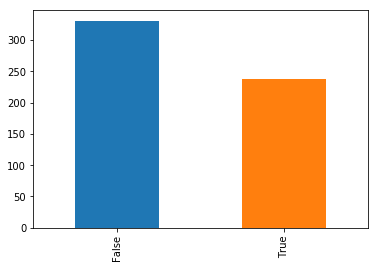

In [33]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(titanic[['Pclass','Sex','Age','family','Fare','Embarked']],titanic['Survived']==1,test_size=0.2,random_state=5)
y_train.value_counts().plot(kind='bar')

## Decision Tree Modelling
Use a decision tree classifier with a minimum depth of 6, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model.¶

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
decisiontree=DecisionTreeClassifier(criterion='entropy',max_depth=6)
obtained_tree=decisiontree.fit(titanic[['Pclass','Sex','Age','family','Fare','Embarked']],titanic['Survived'])

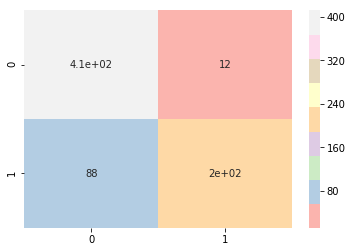

In [21]:
import seaborn as sb
Predicted_Species=obtained_tree.predict(titanic[['Pclass','Sex','Age','family','Fare','Embarked']])
sb.heatmap(confusion_matrix(titanic['Survived'],Predicted_Species),annot=True,cmap='Pastel1')

In [22]:
obtained_tree.score(x_test,y_test)

0.8531468531468531

## Perceptron Modelling
Use a perceptron model with a max_iter value 400, to train your model. Obtain the confusion matrix for the predictions. Obtain the score of the model.

In [23]:
from sklearn.linear_model import Perceptron
classifier=Perceptron(max_iter=400)
mod=classifier.fit(x_train,y_train)
predictions=mod.predict(x_test)

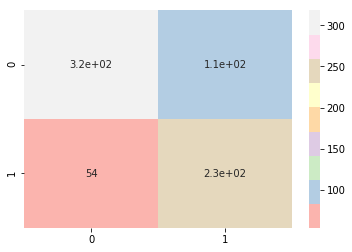

In [24]:
#from sklearn import metrics
#metrics.confusion_matrix(y_test,predictions)
import seaborn as sb
Predicted_Species=mod.predict(titanic[['Pclass','Sex','Age','family','Fare','Embarked']])
sb.heatmap(confusion_matrix(titanic['Survived'],Predicted_Species),annot=True,cmap='Pastel1')

In [25]:
mod.score(x_test,y_test)

0.7342657342657343

## Which of the two models fairs better?

### The Decision Tree model fairs better as it got a better score on the test data.

## There is a relation between age and PClass. Can you fill in the missing values of age with this information instead of dropping the rows entirely?

In [26]:
titanic_df = pd.read_csv("./data/titanic-train.csv")
titanic_df.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']
missing_ages = titanic_df[titanic_df['Age'].isnull()]
# determine mean age based on Sex and Pclass
mean_ages = titanic_df.groupby(['Pclass'])['Age'].mean()

def remove_na_ages(row):
 
    if pd.isnull(row['Age']):
        return mean_ages[row['Pclass']]
    else:
        return row['Age']

titanic_df['Age'] =titanic_df.apply(remove_na_ages, axis=1)


In [27]:
titanic_df['Age'].isnull().sum()

0

In [28]:
titanic

,Survived,Pclass,Sex,Age,Fare,Embarked,family
0,0,3,0,22.0,7.2500,2,1
1,1,1,1,38.0,71.2833,0,1
2,1,3,1,26.0,7.9250,2,0
3,1,1,1,35.0,53.1000,2,1
4,0,3,0,35.0,8.0500,2,0
6,0,1,0,54.0,51.8625,2,0
7,0,3,0,2.0,21.0750,2,4
8,1,3,1,27.0,11.1333,2,2
9,1,2,1,14.0,30.0708,0,1
10,1,3,1,4.0,16.7000,2,2
